# ex1 线性回归

## 输出一个 5*5 的单位矩阵

In [2]:
import numpy as np

def simpleFunction():
    return np.eye(5)

simpleFunction()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 单变量线性回归

数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。确定在哪个城市开展业务。

> You would like to use this data to help you select which city to expand to next.
> The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the opulation of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

### 读取数据

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./ML_Practice/ex1/ex1data1.txt', names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 画出散点图

<AxesSubplot:xlabel='population', ylabel='profit'>

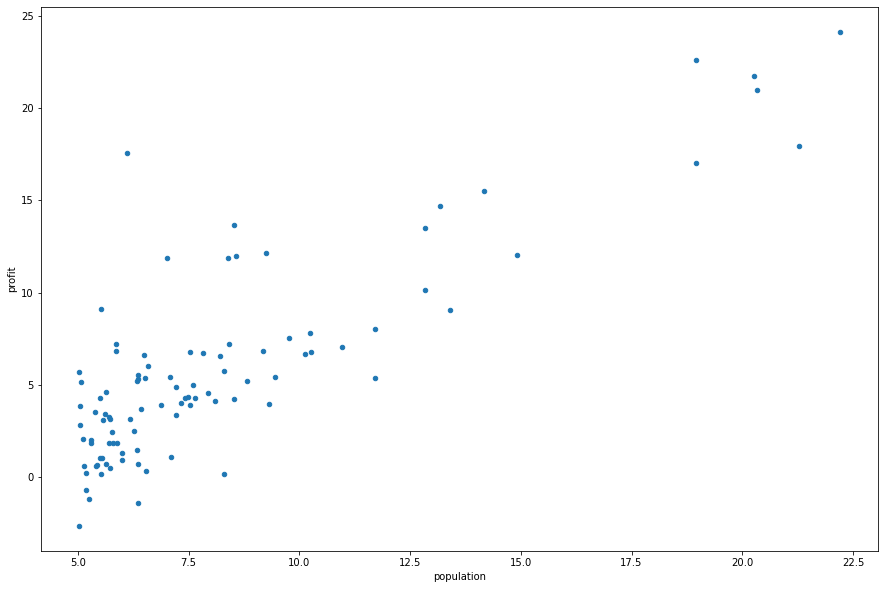

In [3]:
data.plot(kind='scatter', x='population', y='profit', figsize=(15,10))

### 梯度下降

代价函数

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

其中

$$
h_\theta(x^{(i)}) = \theta^TX = \theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n
$$


In [4]:
def costFunction(X, y, theta):
    inner = np.power((X * theta.T - y), 2)
    return np.sum(inner) / (2 * len(X))

In [57]:
# 加入一列x更新 theta0
data.insert(0, 'Ones', 1)

In [58]:
cols = data.shape[1]

#X是data里的除最后列
X = data.iloc[:,:-1]

#y是data最后一列
y = data.iloc[:,cols-1:cols]

In [54]:
# 将X和y转换为 numpy 矩阵
X = np.matrix(X.values)

y = np.matrix(y.values)

theta = np.matrix(np.array([0,0]))

In [17]:
# 梯度下降
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = cost(X, y, theta)
        
    return theta, cost

In [18]:
alpha = 0.01
iters = 1500

In [26]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

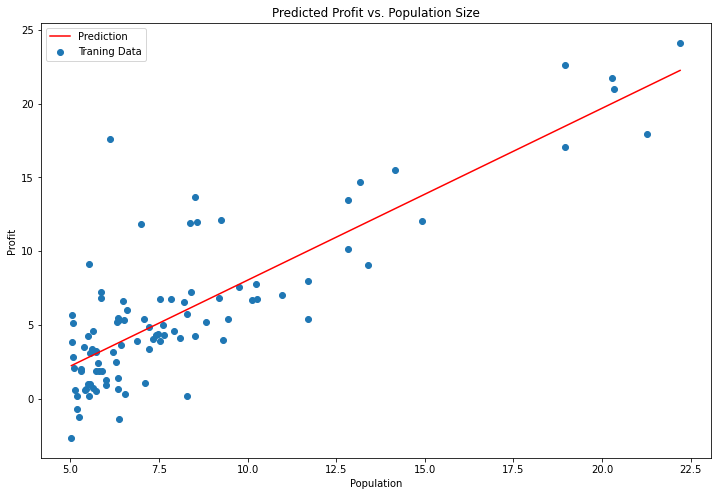

In [32]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()
#原始数据以及拟合的直线

## 多变量线性回归

ex1data2.txt里的数据，第一列是房屋大小，第二列是卧室数量，第三列是房屋售价

根据已有数据，建立模型，预测房屋的售价

In [36]:
# 读取数据
data = pd.read_csv('./ML_Practice/ex1/ex1data2.txt', names=['size', 'number', 'price'])
data.head()

,size,number,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [38]:
# 代价函数
def costFunction(X, y, theta):
    inner = np.power((X * theta.T - y), 2)
    return np.sum(inner) / (2 * len(X))


In [42]:
# 加入一列x更新 theta0
data.insert(0, 'Ones', np.ones(data.shape[0]))


,Ones,size,number,price
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [47]:
from numpy.linalg import inv

cols = data.shape[1]

#X是data里的除最后列
X = data.iloc[:,:-1]

#y是data最后一列
y = data.iloc[:,cols-1:cols]

# 将X和y转换为 numpy 矩阵
X = np.matrix(X.values)

y = np.matrix(y.values)

In [49]:
def normalEqution(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [50]:
normalEqution(X, y)

matrix([[89597.9095428 ],
        [  139.21067402],
        [-8738.01911233]])

# ex2 逻辑回归和正则化

## 逻辑回归

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 数据可视化

In [7]:
path = './ML_Practice/ex2/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


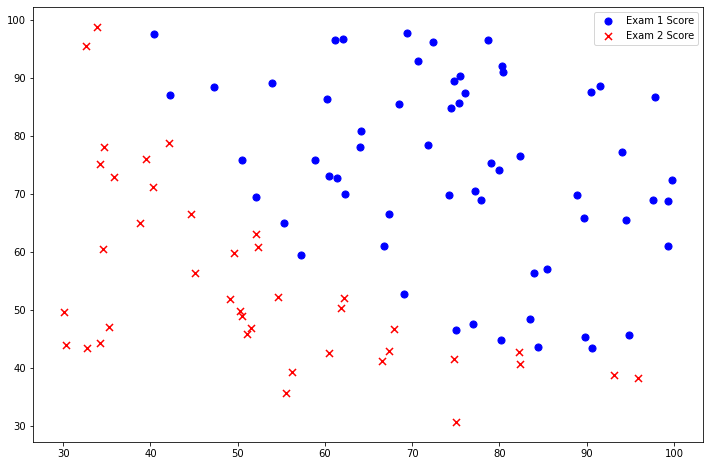

In [11]:
positive = data[data['Admitted'].isin([1])]
negtive = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Exam 1 Score')
ax.scatter(negtive['Exam 1'], negtive['Exam 2'], s=50, c='r', marker='x', label='Exam 2 Score')
ax.legend()
plt.show()

### 实现

In [13]:
# sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [14]:
# 代价函数
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))


In [15]:
# 增加常数列
data.insert(0, 'Ones', 1)

# 初始化 X，y, 0
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1: cols]
theta = np.zeros(3)

# 装换X，y类型
X = np.array(X.values)
y = np.array(y.values)


In [16]:
# 检查矩阵维度
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [17]:
cost(theta, X, y)

0.6931471805599453

In [21]:
# 实现梯度计算的函数（没有更新theta）
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X)
        
    return grad

In [22]:
# 使用工具库计算theta的值
#我们不用自己定义迭代次数和步长，功能会直接告诉我们最优解

import scipy.optimize as opt

# 返回值：优化目标、迭代次数、状态码
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131864,   0.20623159,   0.20147149]), 36, 0)

In [23]:
# 用θ的计算结果代回代价函数计算
cost(result[0], X, y)

0.20349770158947453

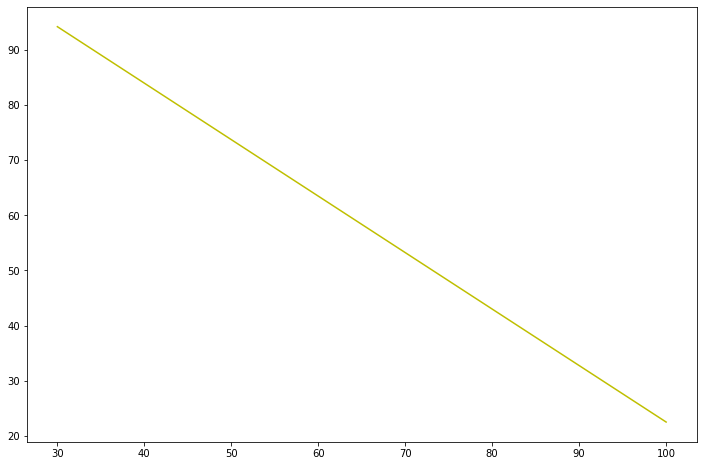

In [24]:
# 画出决策曲线
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = (-result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
